# Data Science: Choose Your Own Adventure
**By Mac-I and Sophia**

For this project, we decided to use the [San Franscisco Crime Dataset](https://www.kaggle.com/c/sf-crime), with the goal of predicting the category of crime based on the date/time of report, and the location of the report. This notebook will serve as a writeup of the work that we have done on this project, in both data exploration and building a model. 

## Introduction
Before we get started, let's talk about what we're trying to do and what information we actually have!

In the dataset, the information we have is:
* **Dates**
* Category
* **Description**
* **Day of Week**
* **Police District**
* Resolution
* **Addresss**
* **X (Longitude)**
* **Y (Latitude)**

The bolded items are the ones that occur in both the test and training datasets. In other words, the bolded items are the ones that we will be using to predict the cateogry of the crime. 


## Importing Everything
To keep our code neat, let's import all the helper libraries we need up here!

In [1]:
% matplotlib inline
import shapefile
import pandas as pd
import numpy as np
import itertools
import re
from time import time

#data exploration imports
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
from datetime import datetime
from ipywidgets import widgets  
from IPython.display import display

import seaborn as sns#Building and testing model iputs
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import log_loss
import xgboost as xgb

isPowerful = False

print "imports imported"

imports imported


/Users/Sophia/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data Exploration
Before we get into building a model, we're going to start by just exploring the dataset. The goal of this is to just explore what kinds of relationships exist in the dataset. 

First, let's start by reading in the dataset


In [2]:
crimeData = pd.read_csv('train.csv')
crimeData

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


Now that we've read in the data, we can see that we have a timestamp column. This, however is a string, so let's actually decompose this into year, month, day, and hour values. 

In [3]:
crimeData['DateTime'] = crimeData['Dates'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

crimeData['Year'] = crimeData['DateTime'].apply(lambda x: x.year)
crimeData['Month'] = crimeData['DateTime'].apply(lambda x: x.month)
crimeData['Day'] = crimeData['DateTime'].apply(lambda x: x.day)
crimeData['Hour'] = crimeData['DateTime'].apply(lambda x: x.hour)

In the dataset, we have two different kinds of data: location data and time data that we can use to predict the type of crime.

First, we'll start by creating plots of the crimes for each location. 

### The Relationship between Location and Crime Category
In the graphs below, we'll show some of the work we did to explore how location and the category of crime are related. 

To do this, we're going to use ipython notebook widgets, to allow a user to choose a category and then display all the crimes of that category that occurred in our training data. 

First, we will create the dataframe that we need to plot the information. 

In [4]:
#Only get the non lat-long-outlier crime reports
displayCrimeData = crimeData[(crimeData.X<-121) & (crimeData.Y<40)]

Next, we will create a function that given a crime, plots the crimes of that category. (Thanks to our [classmates](https://github.com/BrennaManning/DataScience16CYOA/blob/master/data_exploration.ipynb) for providing the idea to do a hexbin plot!)

In [5]:
def crime_map_display(crime):
    #Load in the map data and set the appropriate lat long variables
    mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
    asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
    lon_lat_box=[-122.52469, -122.33663, 37.69862, 37.82986]
    
    #get only the crimes that of the category we are showing. 
    crimeDataS = displayCrimeData[displayCrimeData.Category == crime]
    plt.figure()
    plt.grid(False)
    #ax = sns.kdeplot(crimeDataS.Xok, crimeDataS.Yok, clip=clipsize, aspect=1/asp)

    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)
    
    plt.hexbin(crimeDataS.X, crimeDataS.Y, gridsize=100,
           extent=lon_lat_box, alpha=0.5, cmap=plt.get_cmap('Blues'), bins='log')
    
#     g = sns.jointplot(crimeDataS['Latitude'], crimeDataS['Longitude'], kind="hex")
#     g = sns.regplot(x="Latitude", y="Longitude", data=crimeDataS, fit_reg=False, scatter_kws={'alpha':0.3})
    plt.title(crime)
    cb = plt.colorbar()
    cb.set_label('log10(Number of Crimes)')
    

Now, we will want to actually call this function when we update a widget. 

<function __main__.crime_map_display>

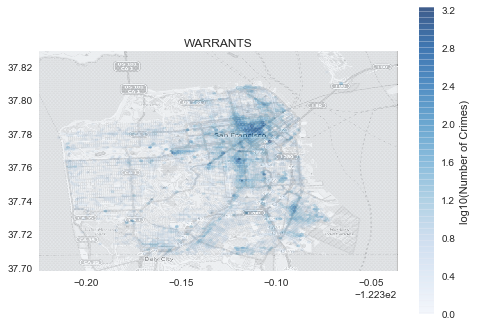

In [6]:
categories = list(zip(crimeData.Category.unique(), crimeData.Category.unique()))
crime = widgets.Select(options=categories, description='Select one of the categories:')
widgets.interact(crime_map_display, crime = crime)

Here, as opposed to using just the number of crimes that occurred, we are using the log<sub>10</sub> of the number of crimes that occurred. If we do not do this, we see most of the cells as clear and one or two as dark blue. Plotting the log<sub>10</sub> of the number of crimes allows us to more clearly see how the number of crimes changes. 

In these graphs (which load a little slowly), There is notably one patch of land where crimes rarely occurr-- according to our research, this is a relatively nice park. Additionally, crimes, for the most part, tend to be concentrated in the downtown area. 

Notably, it appears that the "other" category, which are mostly traffic violations are, unsurprisingly, concentrated on major roads. 

One contrast to crimes being more and more concentrated downtown is the heatmap of prostitution crimes. These tend to just have two centers. 

To give us a little more insight into what is happening, and to break up the data a little more, we decided to split this plot up by hour, too, and explore the data per category, per hour. Here we follow the same structure as above (creating a function that plots the data based on our filtered variables, and then calling that function on change of ipython notebook widgets). 

In [7]:
def image_display(crime, time):
    
    #Load in the Map Data
    mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
    asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
    lon_lat_box=[-122.52469, -122.33663, 37.69862, 37.82986]
    
    crimeDataS = crimeData[crimeData.Category == crime][crimeData.Hour==time]
    plt.figure()
    plt.grid(False)

    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)
    
    plt.hexbin(crimeDataS.X, crimeDataS.Y, gridsize=100,
           extent=lon_lat_box, alpha=0.5, cmap=plt.get_cmap('Blues'), bins='log')
    
    plt.title(crime + " at time :" + str(time))
    cb = plt.colorbar()
    cb.set_label('log10(Number of Crimes)')

/Users/Sophia/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


<function __main__.image_display>

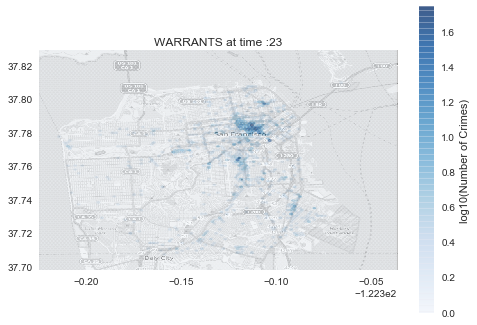

In [8]:
vals = list(zip(crimeData.Category.unique(), crimeData.Category.unique()))
crime = widgets.Select(options=vals, description='Select one of the values:')
hour = widgets.IntSlider(min=0, max=23, value=2003)
widgets.interact(image_display, crime = crime, time=hour)

Some noteable takeaways here are that:
* For most categories of crime, there is a lull around 3 am
* Most crime tends to be concentrated downtown. We predict that this is because many more people work/live in this area than anywhere else, not because this is actually a more dangerous place to live

Although it is helpful to see the map for different categories, for different hours, this view of the data does not provide the most intuitive way to visualize time-based crime patterns. 

### Crime Distribution of Day of Week and Hour
To dig into this, let's look first at the distribution of crime patterns by day of week and hour of the day. Using the same pattern described above, we'll implement a function that creates a plot and declare the widgets to control it.

First, let's group the crimes by day of week. 

In [9]:
groupedByDayOfWeek = crimeData.groupby(['DayOfWeek', 'Category']).count().reset_index()

Now we can declare our function and create the widget

<function __main__.image_display_day_of_week>

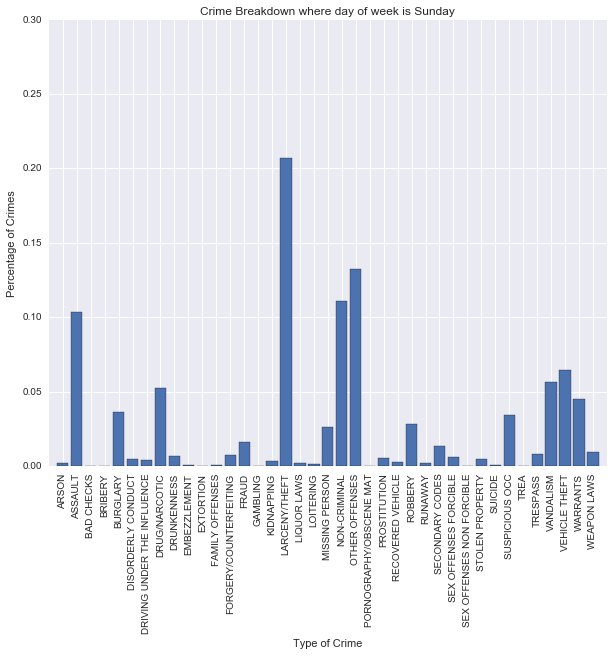

In [10]:
def image_display_day_of_week(i):
    # Get the string for the day of week
    dayOfWeek = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    day = dayOfWeek[i]
    
    #Get the number of crimes that occurred on this day of week
    #(For normalization purposes)
    totalCrimes = sum(groupedByDayOfWeek[groupedByDayOfWeek.DayOfWeek == day]['Dates'].tolist())
    
    #Get a list of the different crime types
    crimeTypes = sorted(crimeData.Category.unique().tolist())
    #Calculate the percentage of crimes that occurred that were of a given category
    crimeCountsPercent = []
    for crime in crimeTypes:
        countList = groupedByDayOfWeek[(groupedByDayOfWeek.DayOfWeek == day) & (groupedByDayOfWeek.Category == crime)]['Dates'].tolist()
        #Here, we're doing some error handling 
        #If no crimes of a certain type occurred on a given day, 
        #then append zero
        if (len(countList) > 0):
            count = countList[0]
        else:
            count = 0

        crimeCountsPercent.append(1.0*count/totalCrimes)

    #Create the figure
    plt.figure(figsize=(10,8))
    plt.bar([x + 0.1 for x in range(len(crimeCountsPercent))], crimeCountsPercent, width = 0.8)
    plt.xticks([x + 0.5 for x in range(len(crimeCountsPercent))], crimeTypes, rotation='vertical')
    plt.axis([-0.5, 39.5, 0 ,0.3])
    plt.title('Crime Breakdown where day of week is ' + str(day))
    plt.xlabel('Type of Crime')
    plt.ylabel('Percentage of Crimes')

#Outside of the function create the widgets
step_slider = widgets.IntSlider(min=0, max=6, value=0)
widgets.interact(image_display_day_of_week, i=step_slider)

This is a slightly easier way of seeing that for all days of the week, larceny/theft and other offenses are the most common crimes. 

In general, it appears that there is an increase of crimes like larceny/theft, assault, and drug/narcotic-related offenses over the weekend, and less during the week.

Additionally, to explore whether certain crimes happen more often at certain times of day, let's also make a similar plot for hour of the day. First, we group by hour:

In [11]:
groupedByHour = crimeData.groupby(['Hour', 'Category']).count().reset_index()

<function __main__.image_display_hour>

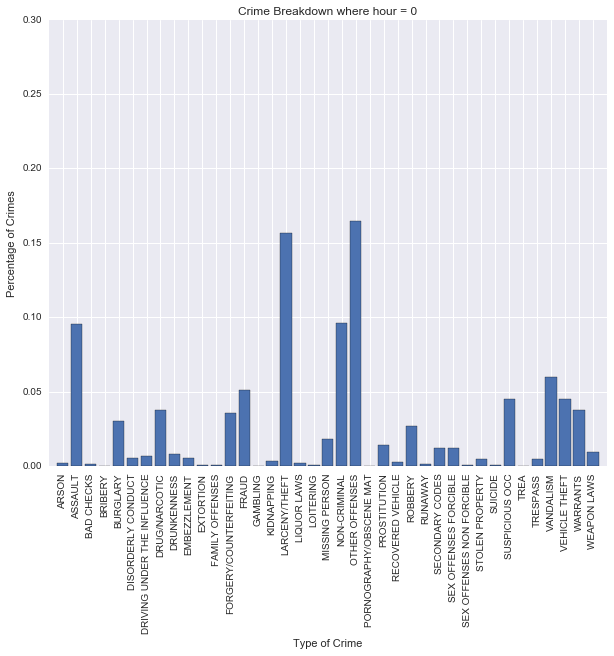

In [12]:
def image_display_hour(i):
    #get the hour of the day
    hour = i
    #Count the number of crimes that occured in that hour
    #(for normalization)
    totalCrimes = sum(groupedByHour[groupedByHour.Hour == hour]['Dates'].tolist())
    
    #Get the number of each type of crime that occured in that hour
    crimeTypes = sorted(crimeData.Category.unique().tolist())
    crimeCountsPercent = []
    for crime in crimeTypes:
        countList = groupedByHour[(groupedByHour.Hour == hour) & (groupedByHour.Category == crime)]['Dates'].tolist()
        #Handle the zero-occurrence case
        if (len(countList) > 0):
            count = countList[0]
        else:
            count = 0

        crimeCountsPercent.append(1.0*count/totalCrimes)

    #create the plot
    plt.figure(figsize=(10,8))
    plt.bar([x + 0.1 for x in range(len(crimeCountsPercent))], crimeCountsPercent, width = 0.8)
    plt.xticks([x + 0.5 for x in range(len(crimeCountsPercent))], crimeTypes, rotation='vertical')
    plt.axis([-0.5, 39.5, 0 ,0.3])
    plt.title('Crime Breakdown where hour = ' + str(hour))
    plt.xlabel('Type of Crime')
    plt.ylabel('Percentage of Crimes')


#Create the widget
step_slider = widgets.IntSlider(min=0, max=23, value=0)
widgets.interact(image_display_hour, i=step_slider)

Here, we can see that the distribution of crimes does change over the course of the day.

There is a huge shift in the distribution to be mostly larceny/theft crimes around 6pm. We hypothesize that this is because most larcenty/theft is report when people get home or to their cars after work. 

Additionally, at around 2 am, it appears that the distribution shifts so that assault is the most common crime.

### Visualizing Patterns of Occurrence for Crimes
Although these visualizations help us get a general  sense about what the distribution of crimes look like at various times, it would also be helpful to visualize the pattern of one crime over time. 

To do this, let's again use ipython widgets. Because this is a little computationally intensive, though, let's create the dataframe outside of the function where we update the plot. 


In [13]:
groupedByTime = crimeData.groupby(['DayOfWeek', 'Hour', 'Category']).count().reset_index()

Now, we can write a function to plot the time heatmap for a given category.

<function __main__.show_time_heatmap>

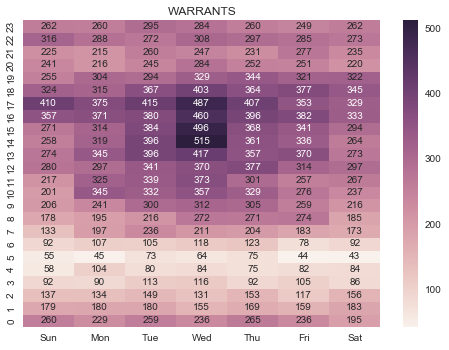

In [14]:
def show_time_heatmap(crime):
    daysOfWeek = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    daysOfWeekDisp = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    hours = range(24)
    
    numCrimes = np.zeros((len(hours), len(daysOfWeek)))
    for i,hour in enumerate(hours):
        for j,dayOfWeek in enumerate(daysOfWeek):
            try:
                crimeCount = groupedByTime[(groupedByTime.DayOfWeek == dayOfWeek) & 
                                           (groupedByTime.Hour == hour) & 
                                           (groupedByTime.Category == crime)]['Dates'].tolist()[0]
            except:
                crimeCount = 0


            numCrimes[23-hour][j] = int(crimeCount)

    g = sns.heatmap(numCrimes, annot=True, fmt='.0f')
    g.set_title(crime)
    g.set(xticklabels = daysOfWeekDisp)
    g.set(yticklabels = hours)
    
    
crimeCategories = groupedByTime.Category.unique().tolist()
vals = list(zip(crimeData.Category.unique(), crimeData.Category.unique()))
crime = widgets.Select(options=vals, description='Select one of the values:')
widgets.interact(show_time_heatmap, crime = crime)

In exploring these plots, it appears that there tends to be a similar pattern of higher levels of crime in the evening and lower levels of crime in the morning. Many crimes also occur more often on the weekends. 

Notable exceptions to this pattern appear to be drug/narcotic-related offenses (which are most common Wednesdays around lunch time) and missing person cases which appear to be reported most often when in the mornings when people don't show up for work. 

## Making a Model
Now that we've explored the data, we're going to start building a model. To make our lives easier, we're going to follow a pretty simple workflow. We will 
1. Read in the Data
2. Clean the training data
3. Create a Model using the cleaned data
4. Score the model using the crime categories in the training data
5. If the model performs well (better than previous attempts) we will: 
  1. Repeat steps 1-3 with the test data. 
  2. Generate a submission file to upload to Kaggle. 
  
Rather than talking through each successive iteration of our model, the following code will instead talk through everything we developed in each of these steps. 

### Loading the data and constants
Here we load the data into a panda dataframe and set some initial constants. Specifically, we are hard-coding a variable with all of the different categories. This will come in handy later when we generate a submission file. 

In [15]:
crimeData = pd.read_csv('train.csv')
#The categories found in the dataset
Categories = ['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
              'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
              'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
              'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
              'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
              'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
              'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
              'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
              'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
              'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
              'WARRANTS', 'WEAPON LAWS']

### Preprocessing the data
This section will cover how we cleaned the data as well as how we added features. In this section, we first define a wrapper function that will take in a dataframe that we read in from a csv and return our pre-processed dataframe. This function will call the functions that we write to clean/recode/generate new features for the data. 

In [16]:
def recodeData(df, isTrain = False):
    '''This function takes in the dataframe that we get from loading in the 
    SF crime data and returns a re-coded dataframe that has all the 
    additional features we want to add and the categorical features recoded 
    and cleaned.
    '''

    #All of these functions return both the new dataframe ad the list of columns that we added. 
    df, newLatLon = removeOutlierLatLon(df)
    df, newDate = recodeDates(df)
    df, newDistrict = recodePoliceDistricts(df)
    df, newAddress, streetColumns = recodeAddresses(df)
    df, newWeather = addWeather(df)

    #Add the new columns to our list of added columns
    addedColumns = [] 
    addedColumns += newDate
    addedColumns += newDistrict 
    addedColumns += newLatLon
    addedColumns += newAddress
    addedColumns += newWeather
   

    #If this is the traning data, we want to remove the columns that we will not have access to in the test set. 
    #We also want to recode the crime category information in the dataframe if this is the test dataset.
    if (isTrain):
        newCategory = recodeCategories(df)
        addedColumns += newCategory
        try: #prevents error if the columns have already been removed
            columnsToDrop = ['Descript', 'Resolution']
            df.drop(columnsToDrop, axis=1, inplace=True)
        except:
            print "already recoded"
         

    return df, addedColumns, streetColumns

#### Recode the Categories
Here we turn the category names into integers to ease classification. Not all of the models that we used can handle text-based category data, so we need to convert the categories to a number. We do this by mapping each category to its respective index in the category list. 

In [17]:
def recodeCategories(df):
    '''This function will recode the Categories from strings into integers'''
    df['CategoryRecode'] = df.Category.apply(lambda x: Categories.index(x))
        
    return df, ['CategoryRecode']

#### Fixing the Latitudes and Longitudes that do fall in San Francisco
During our data exploration we noticed that some of the latitudes and longitudes listed were not anywhere close to San Francisco. In order to fix this we calculated the median latidute and logitude for each police district. We then assigned the appropriate median latitude and logitude to those data points with invalid latitude and logitudes.

In [18]:
def removeOutlierLatLon(df):
    '''This function will remove outlier Latitudes and Longitudes'''
    df.loc[df.X > -121, 'X'] = df.loc[(df.X > -121)].apply(lambda row: df.X[df["PdDistrict"] == row['PdDistrict']].median(), axis=1)
    df.loc[df.Y > 38, 'Y'] = df.loc[(df.Y > 38)].apply(lambda row: df.Y[df["PdDistrict"] == row['PdDistrict']].median(), axis=1)

    return df, ['X', 'Y']

#### Recoding Dates
In order to make the "Dates" column useful we needed to recode them into columns such as "Year", "Month", "Day", "Hour", "Minute". We also needed to recode the "DayOfWeek" into a nurerical format since some of the models can't handle string categorical data. It also makes sense from the perspective that a model may want to group data by weekday vs weekend which is much easier with numerical data.

In [19]:
def recodeDates(df):
    '''This function takes in a dataframe and recodes the date field into 
    useable values. Here, we also recode the day of week.'''
    #Recode the dates column to year, month, day and hour columns
    df['DateTime'] = pd.to_datetime(df['Dates'], format ='%Y-%m-%d %H:%M:%S')

    df['Year'] = df['DateTime'].apply(lambda x: x.year)
    df['Month'] = df['DateTime'].apply(lambda x: x.month)
    df['Day'] = df['DateTime'].apply(lambda x: x.day)
    df['Hour'] = df['DateTime'].apply(lambda x: x.hour)
    df['Minute'] = df['DateTime'].apply(lambda x: x.minute)
    df['DayOfWeekRecode'] = df['DateTime'].apply(lambda x: x.weekday())

    return df, ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeekRecode']

#### Recoding the Police districts
Similarly to the "DayOfWeek" column, the "PdDistrict" column needed to be recoded in order to be useful. We did this with one-hot encoding since the there is no inherent order to the districts, unlike day of week, where there is an order.

In [20]:
def recodePoliceDistricts(df):
    '''This function recodes the police district to a one-hot encoding scheme.'''
    districts = df['PdDistrict'].unique().tolist()
    
    dummies = pd.get_dummies(df['PdDistrict'], prefix="PdDistrict")
    
    newColumns = dummies.columns.tolist()
    print newColumns
    
    df = pd.concat([df, dummies], axis=1)

    return df, newColumns

#### Recoding the Address field into useful features
The original address field is simply a string that looks like "2000 Block of THOMAS AV" or  "JEFFERSON ST / HYDE ST". In order to make this field useful there are a couple different methods we used. The first thing we did was create a flag indicatin whether the address was an intersection of 2 streets or simply a block. We also pulled out the block number (if applicable) as well as the name(s) of the street(s).

In [21]:
def recodeAddresses(df):
    '''This function will attempt to create some features related to the address field in 
    the database. To do this, first, we need to split up the address field into two different
    steet fields, a block nnumber, and a boolean specifying whether it's a street corner '''
    
        
    #Also add the "did the crime occur on a street corner field?"
    df['StreetCornerFlag'] = df['Address'].apply(lambda x: len(x.split(" / ")) > 1)
    
    #If there are two streets, split fields. Also extract the block number
    df['street1'] = df['Address'].apply(lambda x: re.sub(r'^\d+ Block of ','',x.split(" / ")[0]))
    df['street2'] = df['Address'].apply(lambda x: (x.split(" / ")[1]) if (len(x.split(" / ")) > 1) else '')

    df['BlockNumber'] = df['Address'].apply(lambda x: int(re.findall(r'^\d+',x)[0]) if (len(re.findall(r'^\d+',x)) > 0) else None )
    df['BlockNumber'] = df['BlockNumber'].fillna(-1)

    
    streetColumns = []
    
    #one-hot encoding the streets requires more RAM than the standard computer has
    if isPowerful: 
        print "starting street dummy creation"

        #create a one-hot encoding of the Streets
        street1Dummy = pd.get_dummies(df['street1'])
        print "completed street 1 dummy creation"
        
        street2Dummy = pd.get_dummies(df['street2'])
        print "completed street 2 dummy creation"

        #turn the 0s into NaNs so that 'combine_first' can merge them
        street1Dummy = street1Dummy.replace(0, np.nan)
        street2Dummy = street2Dummy.replace(0, np.nan)
        
        #merge the 2 one-hot address frames into 1
        mergedStreetDummy = street1Dummy.combine_first(street2Dummy)
        print "completed address dummy DataFrames merge"
        
        #turn the NaNs back into 0s
        mergedStreetDummy = mergedStreetDummy.fillna(0)
        print "completed fillna on mergedAddressDummy"
        
        #extract all the new street columns
        streetColumns = list(mergedStreetDummy.columns.values)

        #merge the street data and the original dataframe
        df = pd.concat([df, mergedStreetDummy], axis=1)
        print "completed merge of original df and new dummy variable df"
    
    return df, ['StreetCornerFlag', 'BlockNumber'], streetColumns

#### Add Daily Weather Data
We were interested to know if the weather played a role in the types of crimes that occured so we added daily information about the max/min temperature as well as percipitation. The data came from NOAA (National Oceanic and Atmospheric Administration) and was pulled from https://www.ncdc.noaa.gov/cdo-web/search. Specifically it came from the [downtown station](http://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023272/detail).

In [22]:
def addWeather(df):
    '''add 'PRCP' (precipitation),'TMAX' (Max Temperature),'TMIN' (Min Temperature) to each data point'''
    
    # create column to merge the weather data on (eg. 01-29-2016 becomes "20160129")
    df['DATE'] = df['DateTime'].apply(lambda x: int( str(x.year)+x.strftime('%m')+x.strftime('%d') ))
    
    weatherData = pd.read_csv('weather1.csv')
    
    #replace how NaNs are encoded
    weatherData = weatherData.replace('-9999', np.nan)
    
    #get subset of full dataframe
    weatherData = weatherData[['DATE','PRCP','TMAX','TMIN']]
    
    #merge the data frames based on the integer coumln "DATE"
    df = pd.merge(df, weatherData, on='DATE')
    
    return df, ['PRCP','TMAX','TMIN']

#### Recode the Training Data
Now that we have created functions that do all of our pre-processing for us, we recode the test data. 

In [23]:
crimeData, addedColumns, streetColumns = recodeData(
    crimeData, isTrain = True)
crimeData.describe()

['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']


,X,Y,Year,Month,Day,Hour,Minute,DayOfWeekRecode,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,...,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,StreetCornerFlag,BlockNumber,DATE,PRCP,TMAX,TMIN,CategoryRecode
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,...,878049.000000,878049.000000,878049.000000,878049,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,-122.422763,37.767035,2008.712046,6.436509,15.570623,13.412655,20.155026,2.992691,0.101852,0.097329,...,0.179013,0.074707,0.093171,0.297038,704.776747,20087779.678321,13.759622,179.030606,107.848622,19.338687
std,0.025284,0.024165,3.631194,3.428972,8.783005,6.549573,18.594915,1.972023,0.302454,0.296406,...,0.383363,0.262917,0.290673,0.456954,1001.193208,36296.947681,52.905671,41.371282,24.864211,10.688637
min,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,False,-1.000000,20030106.000000,0.000000,72.000000,22.000000,0.000000
25%,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,20060111.000000,0.000000,150.000000,89.000000,16.000000
50%,-122.416420,37.775421,2009.000000,6.000000,16.000000,14.000000,19.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,300.000000,20090307.000000,0.000000,178.000000,111.000000,20.000000
75%,-122.406959,37.784368,2012.000000,9.000000,23.000000,19.000000,33.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1,1000.000000,20120611.000000,0.000000,200.000000,122.000000,25.000000
max,-122.364937,37.819975,2015.000000,12.000000,31.000000,23.000000,59.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,True,8300.000000,20150513.000000,864.000000,367.000000,200.000000,38.000000


### Create and Test our Models

#### Create function to compute the logloss cross-validation score


In [24]:
def runOnTrainData(clf, X, y, numSplits=3):
    '''This function takes in a classifier and the number of folds to compute the cross-validation 
    score. It then splits the data into multiple training and test sets. For each split the model 
    is trained on the training data and then the logloss score is calculated based on the predictions 
    generated by the model.'''
    
    #split the data into training and test sets while ensuring that every category appears in both sets
    k_folds = StratifiedShuffleSplit(y, numSplits, test_size=0.5, random_state=0)

    #create list to store logloss scores in
    scores = []
    
    print "starting kfold testing"
    #enumerate through all the folds
    for k, (train, test) in enumerate(k_folds):
        print ""
        print "starting fit: " + str(k + 1) + " of " + str(numSplits)
        start = time()
        clf.fit(X.iloc[train], y.iloc[train])
        print "fit complete, time: " + str((time() - start))
        startPredictTime = time()
        probs = clf.predict_proba(X.iloc[test])
        print "predict complete, time: " + str((time() - startPredictTime))
        score = log_loss(y.iloc[test].values, probs)
        print "Logloss score: " + str(score)
        print "total time: " + str((time() - start))
        scores.append(score)

    print ""
    print(scores)
    print("Average score: " + str(np.average(scores)))

#### Our First Model: Random Forest
We chose a random forest classifier as our first model because we wanted to learn more about them. Additionally, Random forests seemed to be the most common method on Kaggle. We chose the initial model parameters based the maximum values our computers could handle and included all of the features we had generated thus far.

In [25]:
columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
       'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
        'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
        'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
X = crimeData[columnsToUse]
y = crimeData['CategoryRecode']

clf = RandomForestClassifier(n_estimators=30, max_depth = 7, random_state=1, n_jobs = -1)
runOnTrainData(clf, X, y, numSplits=3)

starting kfold testing

starting fit: 1 of 3
fit complete, time: 4.19423699379
predict complete, time: 6.15242195129
Logloss score: 2.48992102308
total time: 11.0879728794

starting fit: 2 of 3
fit complete, time: 4.26519799232
predict complete, time: 3.57285785675
Logloss score: 2.48637675173
total time: 8.61217403412

starting fit: 3 of 3
fit complete, time: 4.88144207001
predict complete, time: 2.9176030159
Logloss score: 2.48581828632
total time: 8.54751801491

[2.4899210230833062, 2.4863767517294892, 2.4858182863210438]
Average score: 2.48737202038


##### Our reaction
We were happy with this score (2.491) as our first attempt because it was a significant improvement over guessing equally. 

#### Our Second Interation
Our second iteration involved adding a new feature, a flag indicating whether the crime's reported address was an intersection.

In [26]:
columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
       'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
        'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
        'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag']
X = crimeData[columnsToUse]
y = crimeData['CategoryRecode']

clf = RandomForestClassifier(n_estimators=30, max_depth = 7, random_state=1, n_jobs = -1)
runOnTrainData(clf, X, y, numSplits=3)

starting kfold testing

starting fit: 1 of 3
fit complete, time: 4.27323508263
predict complete, time: 3.07436704636
Logloss score: 2.45624955233
total time: 8.09583806992

starting fit: 2 of 3
fit complete, time: 4.27357411385
predict complete, time: 9.09098315239
Logloss score: 2.45752521015
total time: 14.2706210613

starting fit: 3 of 3
fit complete, time: 4.76728105545
predict complete, time: 8.45428705215
Logloss score: 2.4608508737
total time: 13.9879159927

[2.4562495523290799, 2.4575252101501324, 2.4608508737047856]
Average score: 2.45820854539


##### Our Reaction
Adding the street intersection indicator improved the model's score from 2.491 to 2.453. We were pleased that adding this new feature improved our model and decided to make our first kaggle submission (see code at bottom of script). On the Kaggle testing data we scored 2.44156. This was great! It was reassuring to know that our dataset was large enough that our cross-validation scores were likley to be very simlialr to the scores on Kaggle. 

#### Our third Interation
For our third iteration we decied to investigate our on campus resource, "deepthought". Deepthought is a mini "super computer" with 1TB of RAM and 48 cores. We adjusted our parameters to include more trees and depth.

In [27]:
if isPowerful:
    columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
       'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
        'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
        'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag']
    X = crimeData[columnsToUse]
    y = crimeData['CategoryRecode']

    clf = RandomForestClassifier(n_estimators=300, max_depth = 20, random_state=1, n_jobs = 1)
    runOnTrainData(clf, X, y, numSplits=3)

##### Our Reaction
Increasing the number of trees and the maximum depth dramatically improved our score on Kaggle to 2.31827. This was quite exciting and good enough to put us in the top 100 spots on the leaderboard. While we we obviously excited, we were a bit saddened at the idea that simply throwing more computation at the problem could produce way better results than the features we had engineered thus far.

#### Our 4th iteration
For our 4th iteration we wanted to go back and see if we could engineer new features that would improve the model. We decided to focus on the address coulm provided. For each crime we identified the street name(s) where the crime occured and one-hot encoded them. In order to save ourselves some RAM and avoid overfitting we only looked at the most common streets for each crime category.

In [28]:
#The most common streets for each crime in the dataset
commonStreets = ['FOLSOM ST','16TH ST','JONES ST','TAYLOR ST',
                 'ARMSTRONG AV','EDDY ST','LARKIN ST','CASTRO ST',
                 '10TH AV','5TH ST','HAIGHT ST','OFARRELL ST',
                 '11TH AV','PAGE ST','FITCH ST','CAPP ST','13TH ST',
                 '24TH AV','17TH ST','18TH ST','19TH ST','GENEVA AV',
                 'GEARY BL','BRYANT ST','HYDE ST','4TH ST','FULTON ST',
                 'LEAVENWORTH ST','COLE ST','ALEMANY BL','PHELPS ST',
                 'MISSION ST','6TH ST','12TH AV','SHOTWELL ST',
                 'TREAT AV','7TH ST','JEFFERSON ST','QUESADA AV',
                 'TURK ST','2ND ST','MARKET ST','GGBRIDGE HY',
                 '24TH ST','CAPITOL AV','KEARNY ST','HARRISON ST',
                 'LYON ST','BUSH ST','POLK ST','3RD ST','ELLIS ST',
                 'SOUTH VAN NESS AV','POTRERO AV','20TH ST','POWELL ST']
if isPowerful:
    columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
       'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
        'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
        'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag'] + commonStreets
    X = crimeData[columnsToUse]
    y = crimeData['CategoryRecode']

    clf = RandomForestClassifier(n_estimators=300, max_depth = 20, random_state=1, n_jobs = 1)
    runOnTrainData(clf, X, y, numSplits=3)

##### Our Reaction
Adding the most common streets to the set of predictors bumped our Kaggle score from 2.31827 to 2.29871. This was a nice bump to our score, which made up quite pleased. Furthermore it was nice to see that adding the new feature actually made a difference.

#### Our 5th Iteration
During our research into what other people had done we discovered that some of the top scripts were using a classifier called XGBoost (eXtreme Gradient Boosting, see deatils here: http://xgboost.readthedocs.org/en/latest/model.html). We were curious and so decided to test out the model ourselves. We started out using the basic predictors, plus 'StreetCornerFlag' running on our laptops. 

As an aside, it appears that gradient boosting algorightms work by creating one simple model, calculating the error in the predictions of that model, and then learning a subsequent model to try to predict these errors. Random forests, on the other hand, learn many different trees in the first step, and then weight them differently to form a prediction. (The trees are not iteratively created to make the model better.)

For a simple explanation of gradient boosting vs. other algorithms, we found [this video](https://www.youtube.com/watch?v=sRktKszFmSk) very helpful. 

In [29]:
columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
   'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
    'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
    'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag']
X = crimeData[columnsToUse]
y = crimeData['CategoryRecode']

clf = xgb.XGBClassifier(max_depth=7, n_estimators=30, objective='multi:softprob', max_delta_step = 1, learning_rate = 1, nthread = -1)
runOnTrainData(clf, X, y, numSplits=2)
#takes about 5-6 minutes to run per split

starting kfold testing

starting fit: 1 of 2
fit complete, time: 716.940031052
predict complete, time: 95.0648097992
Logloss score: 2.30891801569
total time: 812.664071083

starting fit: 2 of 2
fit complete, time: 710.904156923
predict complete, time: 78.0576169491
Logloss score: 2.309443844
total time: 789.587970018

[2.3089180156880187, 2.3094438439977276]
Average score: 2.30918092984


##### Our Reaction
Wow! XGBoost showed marked improvement over the Random Forest model. When comparing the 2 models running the same features, we saw that XGBoost running on our laptops (with n_estimators=100 and learning_rate = .33) out preformed the Random forest running on deepthought by a significant margin (2.25580 vs. 2.31827). We were naturally quite impressed with XGBoost and decided to switch further development efforts to focus around XGBoost. 

#### Our 6th Iteration
We decided to try out XGBoost on deepthought with some rather absurd parameters and see how it compared to the parameters our laptops could reasonable run. Through experimentation with different parameters we found that XGBoost perfomred best on our dataset when n_estimators * learning_rate = 30. This happened to be exactly the parameters we started with which was quite lucky.

In [30]:
if isPowerful:
    columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
   'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
    'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
    'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag']
    X = crimeData[columnsToUse]
    y = crimeData['CategoryRecode']

    clf = xgb.XGBClassifier(max_depth=8, n_estimators=800, objective='multi:softprob', max_delta_step = .8, learning_rate = .0375, nthread = -1)
    runOnTrainData(clf, X, y, numSplits=2)

##### Our Reaction
Our Kaggle score improved from 2.25580 to 2.24733. While this was certainly an improvement it was not nearly as dramatic of a difference as when we ran the Random Forest with increased parameters. This suggests the XGBoost might be more effiecient in training. This was the highest score we were able to achieve, and it was good enough to put in the top 25 submissions on the Kaggle leaderboard. 

To see what is happening with this model, and what it is focusing on, we can visualize the importance of features that our model learned

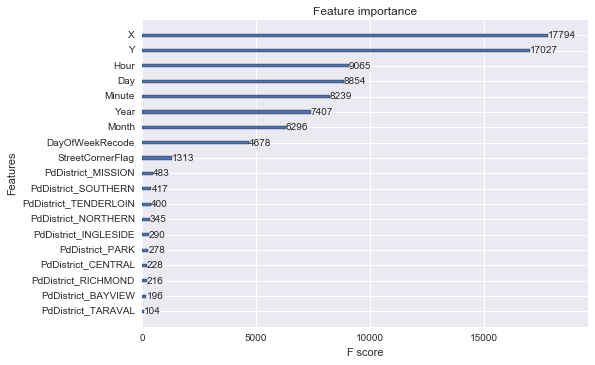

In [31]:
xgb.plot_importance(clf)

What this implies is that, by far, latitude and longitude are the most informative features. After this, time variables become the most important features. 

Interestingly enough, the one-hot encoding of the police districts are all of the least important features. We hypothesize that this is because all of the police district information is encoded in the lat/long data. If we have the computational power to use just the lat and long data, then there is no reason that we should not. 

#### Our 7th Iteration
In our seventh iteration we wanted to investigate whether adding in the most common streets would improve XGBoot's performance.

In [32]:
if isPowerful:
    columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
   'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
    'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
    'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag']  + commonStreets
    X = crimeData[columnsToUse]
    y = crimeData['CategoryRecode']

    clf = xgb.XGBClassifier(max_depth=8, n_estimators=800, objective='multi:softprob', max_delta_step = .8, learning_rate = .0375, nthread = -1)
    runOnTrainData(clf, X, y, numSplits=2)

##### Our Reaction
Unfortunately adding in the most common streets as one-hot encodings did not improve our score. In fact it dropped a tiny bit from 2.24733 to 2.24737. We speculate that these features did not improve XGBoost's performace like it did the Random Forest's because XGBoost was already better at handling the location through the Latitude and Longitude. 

To confirm this, let's look at the importance of the features again!

In [33]:
if isPowerful:
    xgb.plot_importance(clf)

This confirms the idea that this type of model can handle just using the lat/long data, whereas the random forest model cannot perform enough splits to just use the lat/long data.

#### Our 8th Iteration
Since we were not really able to improve our model by reformatting the data we currently have by making new features, we decided to see whether adding data from an external source would allow us to make better predictions. Although there are many different external datasets that we could use, we elected to try adding in weather data that we got from [SOURCE](SOURCE). 

In [34]:
if isPowerful:
    columnsToUse = ['X','Y', 'Year', 'Month', 'Day','Hour', 'Minute',
   'DayOfWeekRecode', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 
    'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 
    'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'StreetCornerFlag', 'PRCP','TMAX','TMIN']
    X = crimeData[columnsToUse]
    y = crimeData['CategoryRecode']

    clf = xgb.XGBClassifier(max_depth=8, n_estimators=800, objective='multi:softprob', max_delta_step = .8, learning_rate = .0375, nthread = -1)
    runOnTrainData(clf, X, y, numSplits=2)

##### Our Reaction
We had hoped that adding in an external data source might boost our score. Unfortunately, it does not appear that weather plays a significant factor, as this did not increase our score at all. :( 

### Model Work - Future Iterations
If we were continuing to work on this project, our next steps would be to spend time fully understanding how xgboost works. This would allow us to understand what kind of features would be helpful to engineer for our model. 

For us, one of the most surprising things we learned over the course of this project, is the realationship between adding computational power and engineering better features. Our experience was that any time we added features that boosted performance on our laptops, we did not see the same results when we ran the model on "deepthought". This leads us to believe that it is always better to use as much computational power as you possibly have. On the other hand when data or computational power is limited, it makes sense to engineer features. As we continue our work in this class, we will test this understanding of the tradeoff between adding features and adding more computational power. 

### Generate submission files for Kaggle
After generating and testing each of our models, we also generated a submission file using the test data. To do this, we modified the submission function from [this script](https://www.kaggle.com/shifanmao/sf-crime/random-forest-2/code). 

In [35]:
def make_submission(clf, Xtrain, ytrain, predictors, path='my_submission.csv'):
    '''This function will take in a trained model, a list of predictors, and an optional 
    filepath and create a submissision file for us.'''
   
    test_data = pd.read_csv('test.csv')
    print "test data loaded"
    
    test_data, newColumns, streetColumns = recodeData(test_data)
    print "test data recoded"
    
    testDataColumns = list(test_data.columns.values)
    
    existingPredictors = list(set(predictors) & set(testDataColumns))
    
    clf.fit(Xtrain[existingPredictors], ytrain)
    print "model fitted with all data"
    
    #clf.fit(trainX[predictors], trainY)
    predictions = clf.predict_proba(test_data[existingPredictors])

    submission = pd.DataFrame({
        'Id': test_data.Id
    })
    
    for i in range(predictions.shape[1]):
        submission[Categories[i]] = predictions[:,i]
    submission.to_csv(path, index=False)

    print(" -- Wrote submission to file {}.".format(path))
    return existingPredictors


Now to to generate the submission file we upload to kaggle, we simply run the following code:

Here, we pass in the model, the training data, and the columns we want to use in our model, and we generate a submission file. 

In [36]:
make_submission(clf, X, y, columnsToUse)

test data loaded
['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
test data recoded
model fitted with all data
 -- Wrote submission to file my_submission.csv.


['Y',
 'PdDistrict_BAYVIEW',
 'DayOfWeekRecode',
 'Hour',
 'Year',
 'PdDistrict_CENTRAL',
 'PdDistrict_RICHMOND',
 'Month',
 'PdDistrict_NORTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_MISSION',
 'Minute',
 'PdDistrict_INGLESIDE',
 'StreetCornerFlag',
 'X',
 'PdDistrict_PARK',
 'PdDistrict_TENDERLOIN',
 'Day',
 'PdDistrict_SOUTHERN']